In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

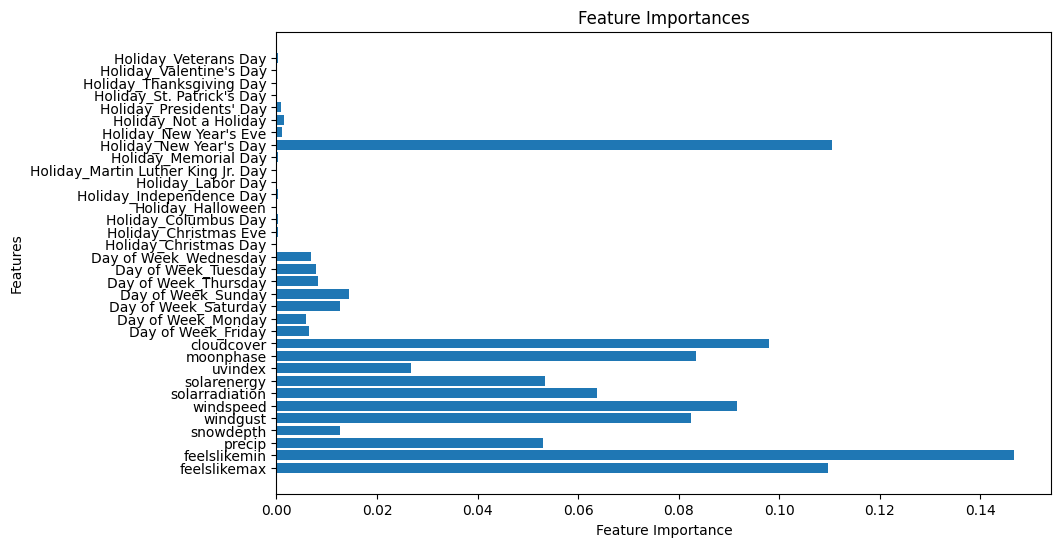

In [13]:


master_df = pd.read_csv('master.csv')
# Assuming master_df contains your data and 'Date' is a datetime column
data = master_df.copy()

# Drop unnecessary columns and missing values if needed
# data.dropna(inplace=True)  # Uncomment this line if you have missing values and want to drop them

# Split data into features (X) and target variable (y)
X = data[['Day of Week', 'feelslikemax', 'feelslikemin', 'precip', 'snowdepth', 
          'windgust', 'windspeed', 'solarradiation', 'solarenergy', 
          'uvindex', 'moonphase', 'Holiday', 'cloudcover']]
y = data['count']

X = pd.get_dummies(X)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get predicted counts
y_pred = rf.predict(X_test)

# Plot feature importances
feature_importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.show()

In [14]:
mse = mean_squared_error(y_test, y_pred)
mse

0.22107870846981753

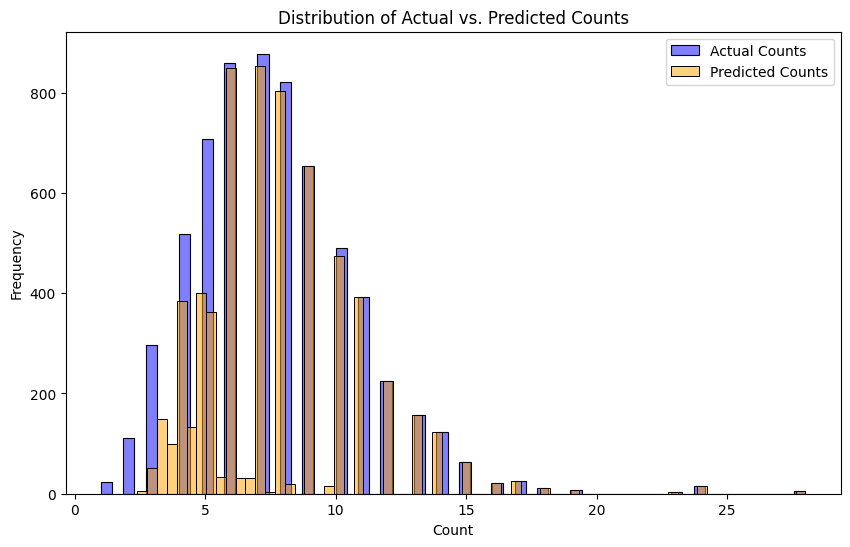

In [15]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(y_test, color='blue', alpha=0.5, label='Actual Counts')
sns.histplot(y_pred, color='orange', alpha=0.5, label='Predicted Counts')
plt.title('Distribution of Actual vs. Predicted Counts')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

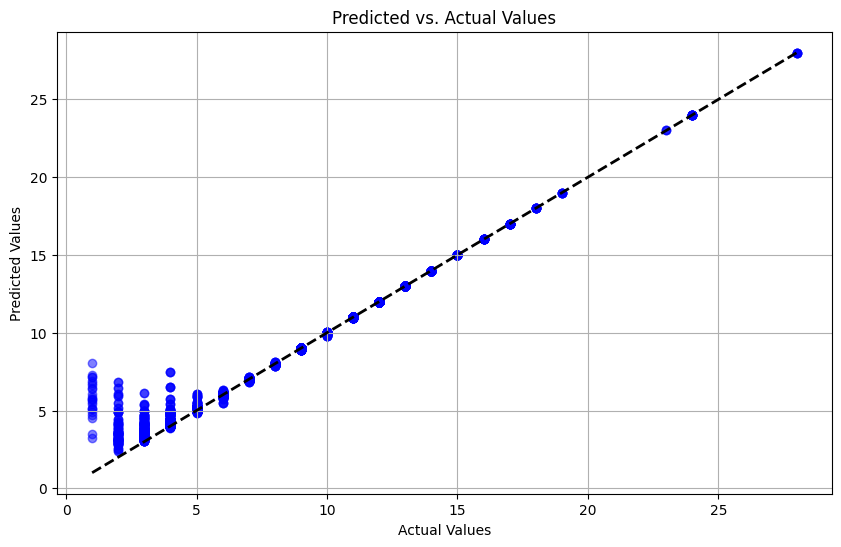

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Predicted vs. Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

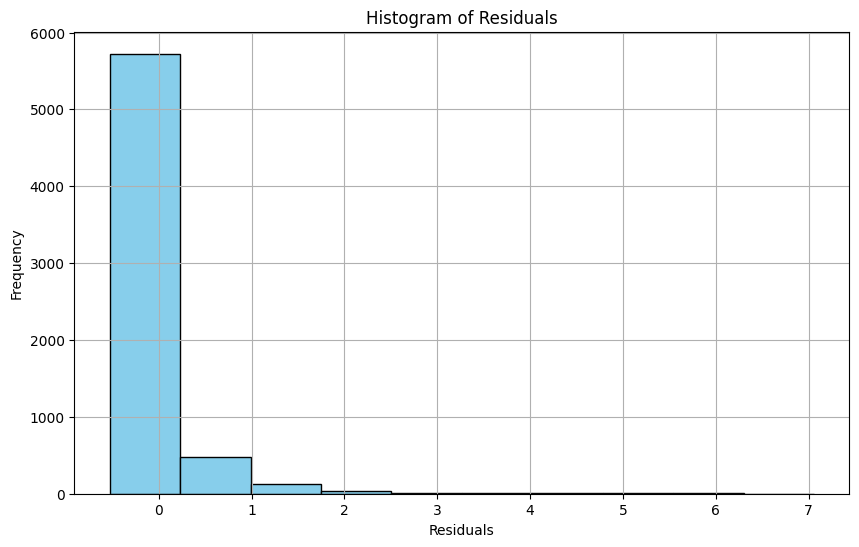

In [17]:
residuals = y_pred - y_test

plt.figure(figsize=(10, 6))
plt.hist(residuals, color='skyblue', edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()